# **GLASS MULTI-CLASS CLASSIFICATION**

# Objective:

To create a predictive model that accurately classifies the type of glass based on its chemical composition, using a decision tree classifier.
Dataset Description:

# Features:
RI: Refractive index

Na: Sodium (weight percent in corresponding oxide)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Target variable:

Type of glass (7 classes):

building_windows_float_processed

building_windows_non_float_processed

vehicle_windows_float_processed

vehicle_windows_non_float_processed (absent in this dataset)

containers

tableware

headlamps

Number of samples: 214

# Exploratory Analysis:

Data Cleaning: No missing values were found.

Correlation Analysis: A heatmap was generated to visualize correlations between features.

Pairwise Plots: Pairwise plots were created to examine relationships between features and the target variable.

# Methodology:

Data Splitting: The dataset was split into 80% training and 20% testing sets.

Model Selection: A decision tree classifier was chosen for its interpretability.

Model Training: The model was trained on the training set using entropy as the splitting criterion and a maximum depth of 3 to control complexity.

Model Evaluation: The model's performance was evaluated on the testing set using accuracy and R^2 scores.

# Results Analysis:

Training Accuracy: 73.1%

Testing Accuracy: 69.8%

R^2 Score: 0.698 (testing set)

Visualization: A decision tree was generated to visualize the model's decision-making process.

# Conclusion:

The decision tree classifier achieved a moderate accuracy of 69.8% in classifying glass types based on their chemical composition.

The model's performance could potentially be improved by:

Tuning hyperparameters (e.g., max_depth, criterion)
Exploring feature engineering techniques
Considering alternative classification algorithms

# References:

https://www.datacamp.com/tutorial/decision-tree-classification-python

https://www.kaggle.com/datasets/uciml/glass/data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
glass = pd.read_csv('/content/glass.csv')

In [ ]:
print(glass.columns)
print(glass.head())
print(glass.dtypes)
print(glass.describe)
glass.isnull()

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object
<bound method NDFrame.describe of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False


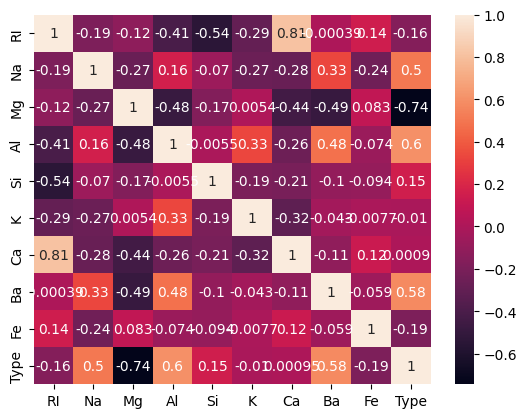

In [ ]:
dataplot = sns.heatmap(glass.corr(),annot=True)

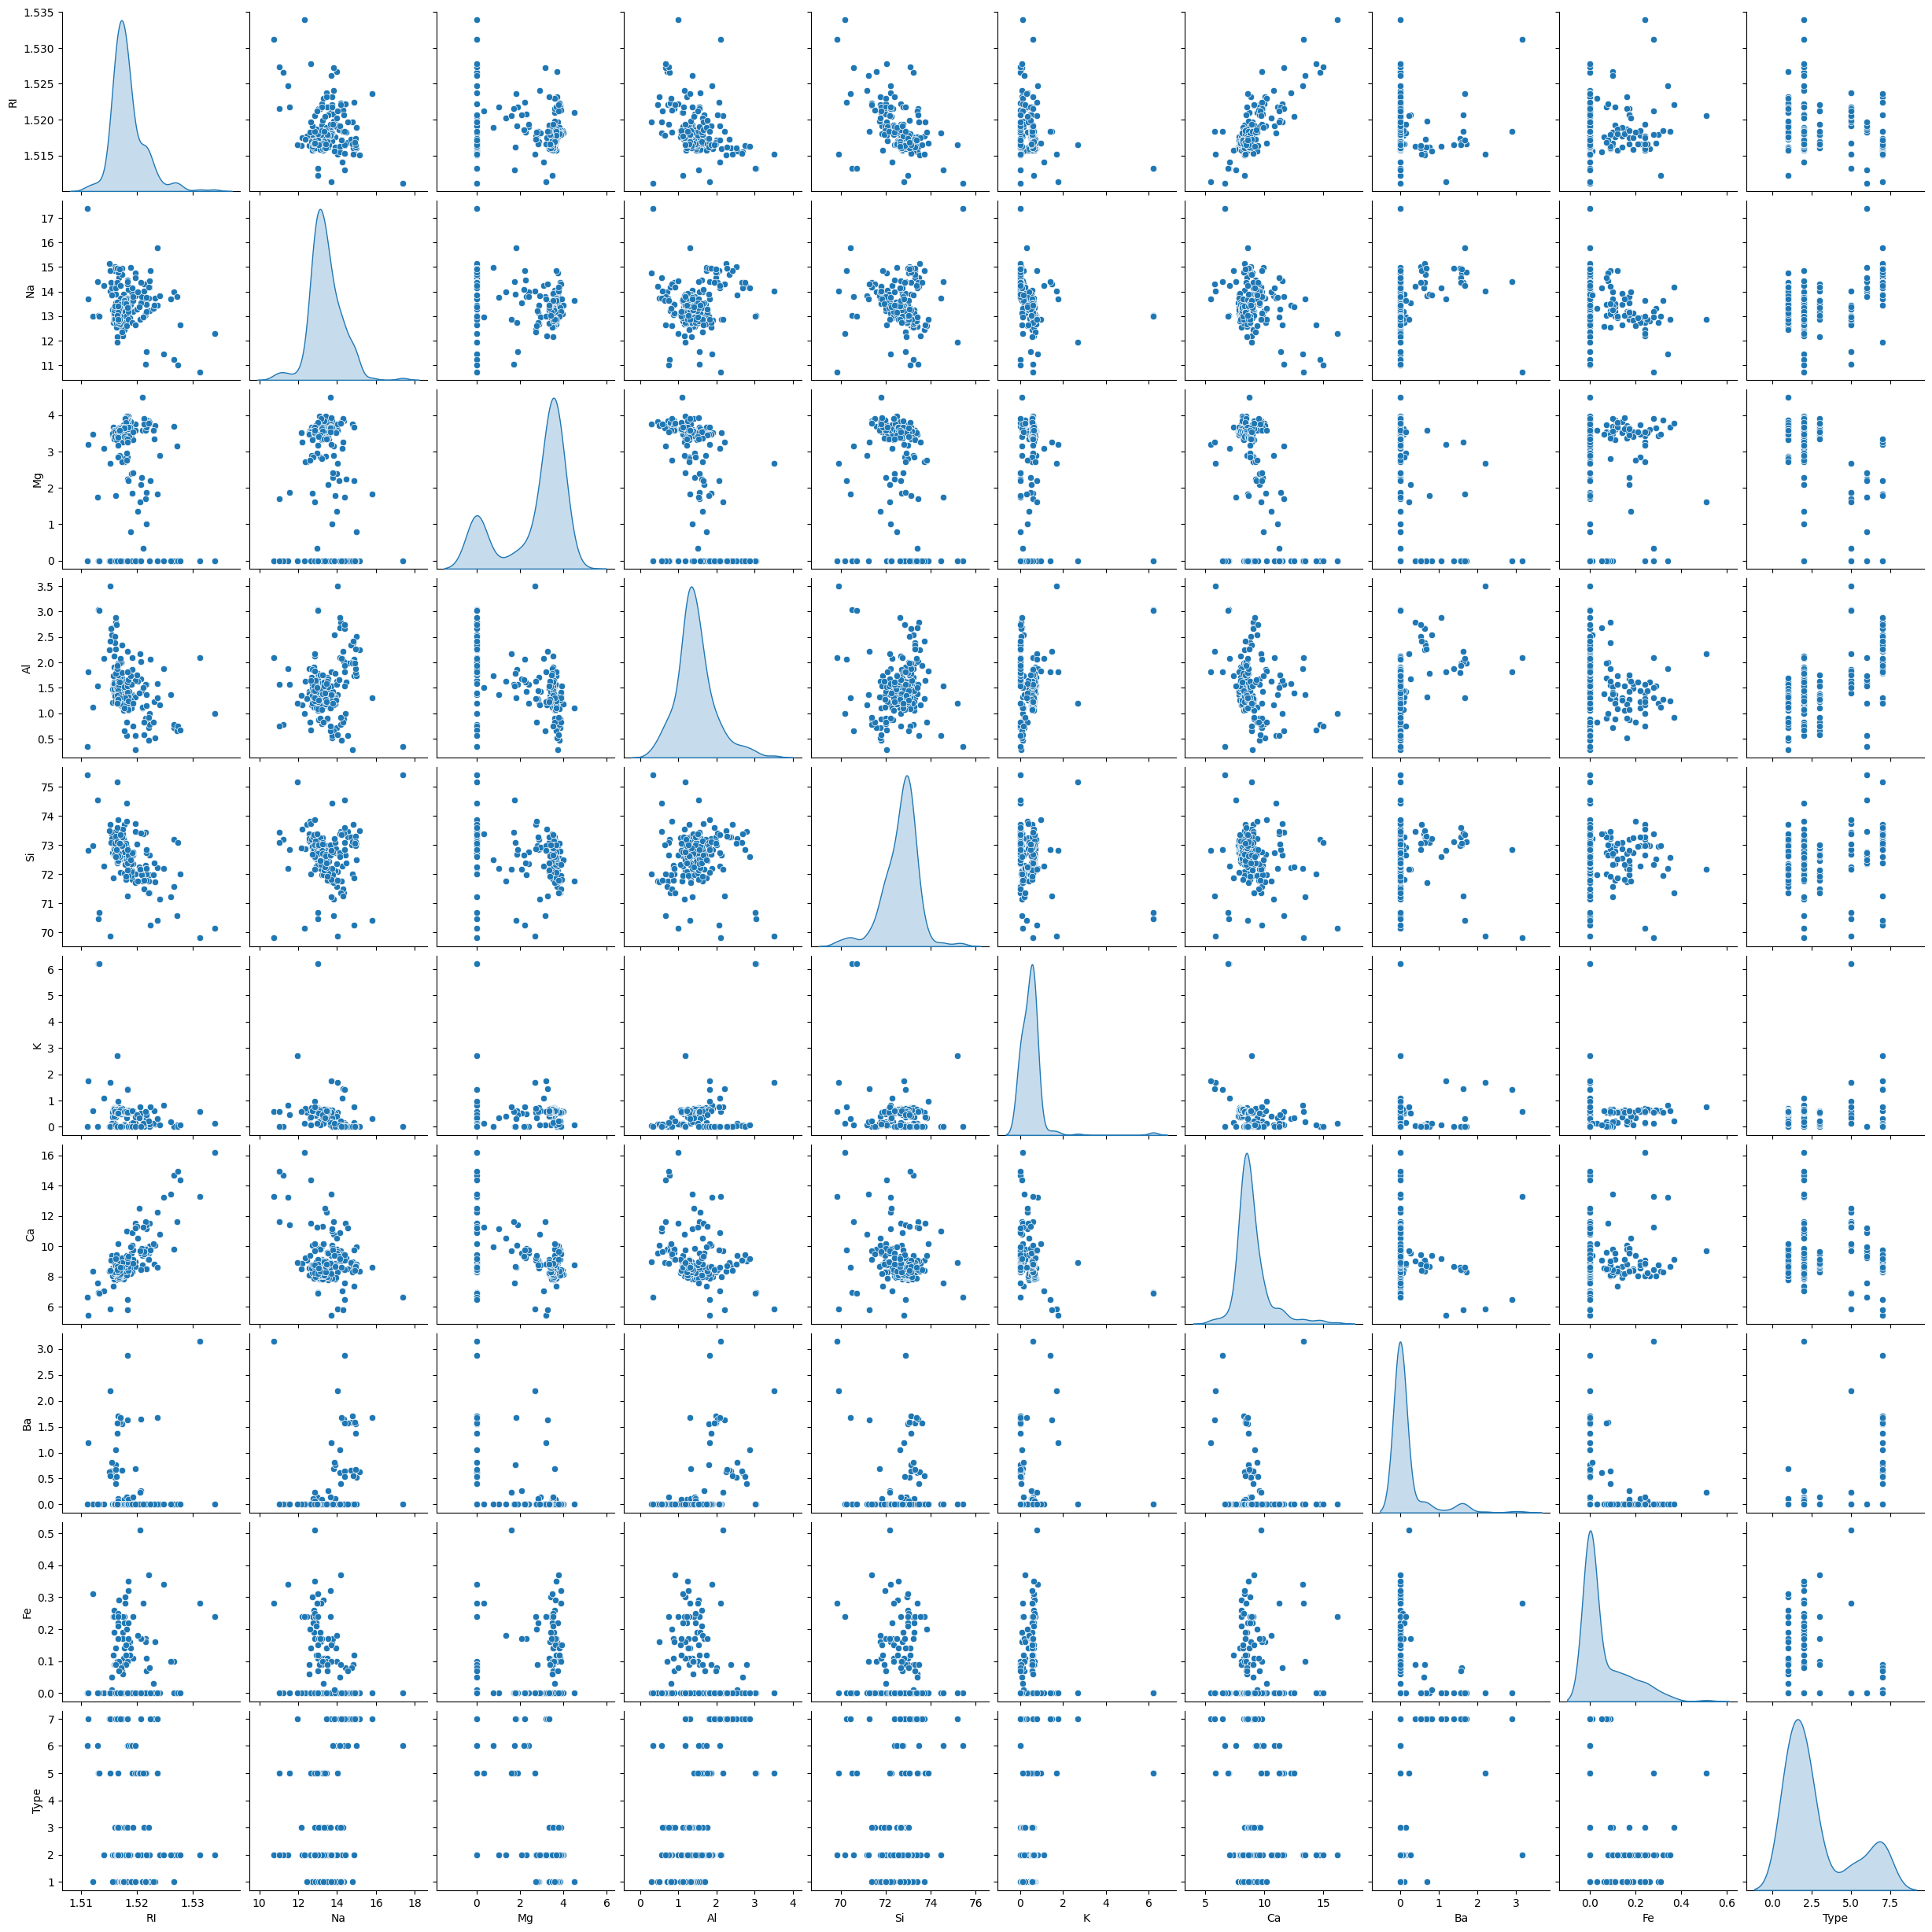

In [ ]:
sns.pairplot(glass,diag_kind='kde')

In [ ]:
X=glass.drop('Type',axis=1)
Y=glass['Type']
print(X,Y)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns] 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y.values,test_size=0.2, random_state=2)

In [ ]:
from sklearn import metrics
model=DecisionTreeClassifier(criterion="entropy", max_depth=3)
model = model.fit(X_train,Y_train) #(training) fiting the data to the dataset
print(model.score(X_train,Y_train)) #r2 score
print(model.score(X_test,Y_test))
print("Accuracy:",(metrics.accuracy_score(Y_test, Y_pred))*100)

0.7309941520467836
0.6976744186046512
Accuracy: 69.76744186046511


In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
feature_cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

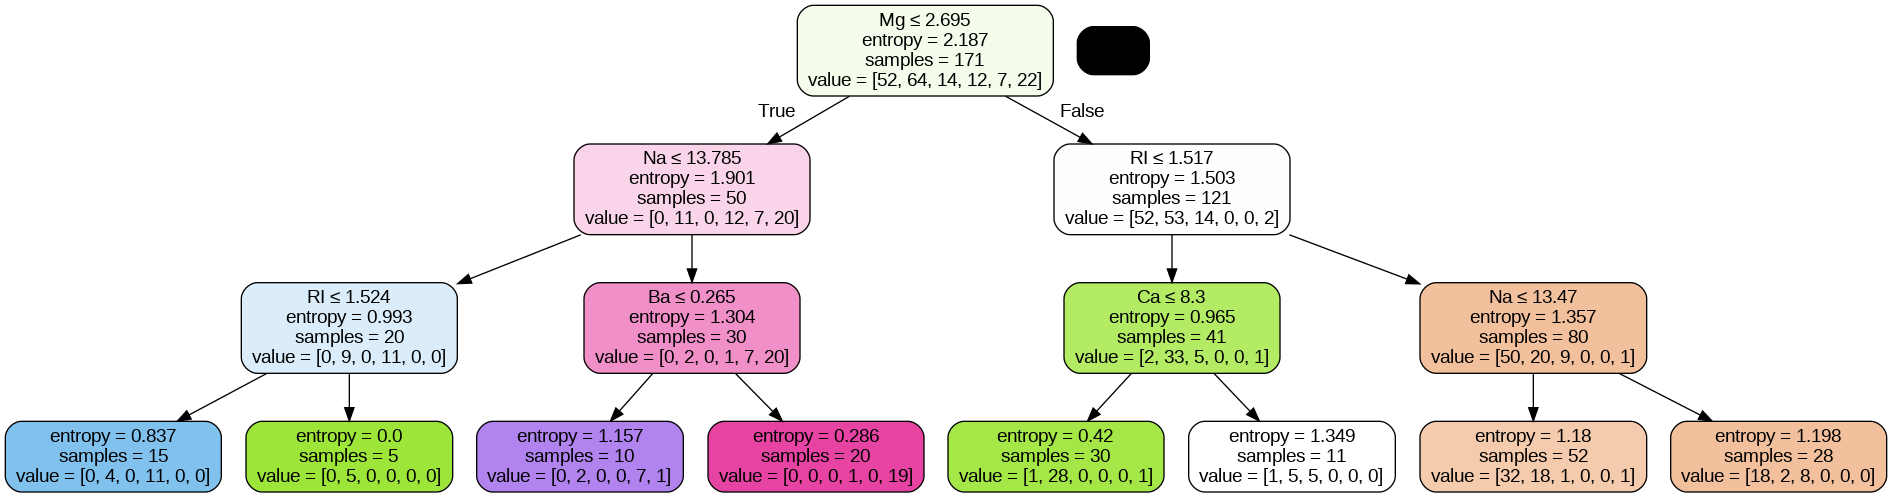

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('glass.png')
Image(graph.create_png())
